# Created on: 14-03-2021 10:28 Hrs

# @author: Bernard Birendra Das

# Importing packages

In [ ]:
# imports
import tweepy, os, re
from textblob import TextBlob
from wordcloud import WordCloud
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Uploading Twitter API Credentials

In [ ]:
api_cred = files.upload()

Saving api-cred.csv to api-cred.csv


# Loading the API Data

In [ ]:
log = pd.read_csv('api-cred.csv')
consumer_key        =  log['key'][0]
consumer_secret     =  log['key'][1]
access_token        =  log['key'][2]
access_token_secret =  log['key'][3]

# Initializing Classes and Creating Objects

In [ ]:
# driver code
 
# Creating an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 
# Set the access_token and access_token_secret
auth.set_access_token(access_token, access_token_secret)
 
# Creating the api object while passing in  the auth information
api =  tweepy.API(auth, wait_on_rate_limit = True)

# Printing the first 100 tweets of the user

In [ ]:
# Extract 100 tweets from twitter.com
posts = api.user_timeline(screen_name = str(input("Enter the name of the account:\t@")), count= 3000, tweet_mode = "extended")
# for tweet in tweepy.Cursor(api.user_timeline,id='USATODAY').items():
#    print(tweet)
 
# Print the last 5 tweets from the account
print("Show the 5 recent tweets:\n")
i = 1
for tweet in posts[0:3000]:
  print("Tweet ["+str(i)+"] : "+tweet.full_text + "\n")
  i+=1

Enter the name of the account:	@elonmusk
Show the 5 recent tweets:

Tweet [1] : @Thomas38697956 New &amp; improved version!

Tweet [2] : @Teslarati @ResidentSponge Special mention of Tesla China

Tweet [3] : @shbzz Obv

Tweet [4] : @Teslarati @ResidentSponge Great work by Tesla team!

Tweet [5] : @EvaFoxU Nice

Tweet [6] : The Earth is not flat, it’s a hollow globe &amp; Donkey King lives there!

Tweet [7] : @EvaFoxU Those two really could have come in handy for the stuck ship!

Tweet [8] : @EvaFoxU Last Kingdom vs Vikings

Tweet [9] : @spacex360 Ascent phase, transition to horizontal &amp; control during free fall were good. 

A (relatively) small CH4 leak led to fire on engine 2 &amp; fried part of avionics, causing hard start attempting landing burn in CH4 turbopump. 

This is getting fixed 6 ways to Sunday.

Tweet [10] : RT @SpaceX: Dragon is go for the first-ever port relocation flight of a commercial spacecraft https://t.co/qV7AktWsqQ

Tweet [11] : Godzilla vs Kong is so amaze mu

# Creating our Dataframe

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
 
# Show the first 5 rows of data
df.head()

,Tweets
0,@Thomas38697956 New &amp; improved version!
1,@Teslarati @ResidentSponge Special mention of ...
2,@shbzz Obv
3,@Teslarati @ResidentSponge Great work by Tesla...
4,@EvaFoxU Nice


# Cleaning the Dataframe

In [ ]:
# Clean the data
 
# Function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)   # Simply removes @mentions
  text = re.sub(r'#', '', text)               # Simply removes '#' symbols
  text = re.sub(r'\n', '', text)              # Simply removes newline characters
  text = re.sub(r'RT[\s]+', '', text)         # Simply removes Retweets
  text = re.sub(r'https?:\/\/\S+', '', text)  # Simply removes hyperlinks
  text = re.sub(r'অ-', '', text)  # Simply removes hyperlinks
 
  return text
 
# Cleaning the Tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
  
# Show Cleaned Tweets
df

,Tweets
0,New &amp; improved version!
1,Special mention of Tesla China
2,Obv
3,Great work by Tesla team!
4,Nice
5,"The Earth is not flat, it’s a hollow globe &am..."
6,Those two really could have come in handy for...
7,Last Kingdom vs Vikings
8,"Ascent phase, transition to horizontal &amp; ..."
9,: Dragon is go for the first-ever port relocat...


# Determining the polarity and subjectivity of the tweets

In [ ]:
# Create a function to get the subjectivity
def getSub(text):
  return TextBlob(text).sentiment.subjectivity
 
# Create a function to get the polarity
def getPol(text):
  return TextBlob(text).sentiment.polarity
 
# Create two new columns for subjectivity and polarity
df['Subjectivity'] = df['Tweets'].apply(getSub)
df['Polarity'] = df['Tweets'].apply(getPol)
 
# Display the new columns
df

,Tweets,Subjectivity,Polarity
0,New &amp; improved version!,0.454545,0.170455
1,Special mention of Tesla China,0.571429,0.357143
2,Obv,0.000000,0.000000
3,Great work by Tesla team!,0.750000,1.000000
4,Nice,1.000000,0.600000
5,"The Earth is not flat, it’s a hollow globe &am...",0.087500,-0.056250
6,Those two really could have come in handy for...,0.550000,0.475000
7,Last Kingdom vs Vikings,0.066667,0.000000
8,"Ascent phase, transition to horizontal &amp; ...",0.508333,0.131667
9,: Dragon is go for the first-ever port relocat...,0.000000,0.000000


# Plotting a Word Cloud on the most appeared words

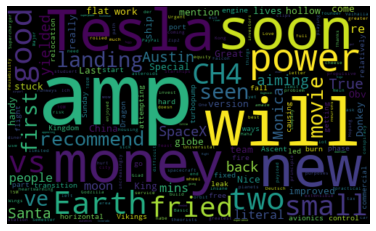

In [ ]:
# plot word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120).generate(allWords)
 
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Categorizing the tweets as positive, negative and neutral

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 
df['Analysis'] = df['Polarity'].apply(getAnalysis)
 
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,New &amp; improved version!,0.454545,0.170455,Positive
1,Special mention of Tesla China,0.571429,0.357143,Positive
2,Obv,0.000000,0.000000,Neutral
3,Great work by Tesla team!,0.750000,1.000000,Positive
4,Nice,1.000000,0.600000,Positive
5,"The Earth is not flat, it’s a hollow globe &am...",0.087500,-0.056250,Negative
6,Those two really could have come in handy for...,0.550000,0.475000,Positive
7,Last Kingdom vs Vikings,0.066667,0.000000,Neutral
8,"Ascent phase, transition to horizontal &amp; ...",0.508333,0.131667,Positive
9,: Dragon is go for the first-ever port relocat...,0.000000,0.000000,Neutral


# Printing all the Positive Tweets

In [ ]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print("["+str(j)+"] "+sortedDF['Tweets'][i])
    print()
    j+=1

[1]  New &amp; improved version!

[2]   Special mention of Tesla China

[3]   Great work by Tesla team!

[4]  Nice

[5]  Those two really could have come in handy for the stuck ship!

[6]  Ascent phase, transition to horizontal &amp; control during free fall were good. A (relatively) small CH4 leak led to fire on engine 2 &amp; fried part of avionics, causing hard start attempting landing burn in CH4 turbopump. This is getting fixed 6 ways to Sunday.

[7]  One of the greatest things I’ve ever seen

[8]   Haha Falcon? Nein!

[9]  This a good path, but I recommend aiming for full reusability

[10] Urgent need to build more housing in greater Austin area!

[11]  True

[12]  Major new Supercharger station coming to Santa Monica soon! Hoping to have 50’s diner &amp; 100 best movie clips playing too. Thanks Santa Monica city!

[13]  After all, SpaceX’s first payload to orbit &amp; back was a wheel of cheese …

[14]    Glad you enjoyed the experience!

[15] Nicheman — his superpower is appeal

# Print all of the Negative Tweets

In [ ]:
# Print all of the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print("["+str(j)+"] "+sortedDF['Tweets'][i])
    print()
    j+=1

[1] The Earth is not flat, it’s a hollow globe &amp; Donkey King lives there!

[2] Godzilla vs Kong is so amaze much wow!Most insane movie I’ve ever seen!Love letter to conspiracy theorists!And yet heartwarming in the end.

[3]   I recommend propulsive landing, as that is extensible to planets, moons &amp; asteroids. Wings &amp; runways are limited to Earth.

[4]   For practical purposes, there is no limit. It will just get increasingly difficult to service.

[5] Me in my sick new car(left him the money) 



# Plotting the polarity and subjectivity

Text(0, 0.5, 'Subjectivity')

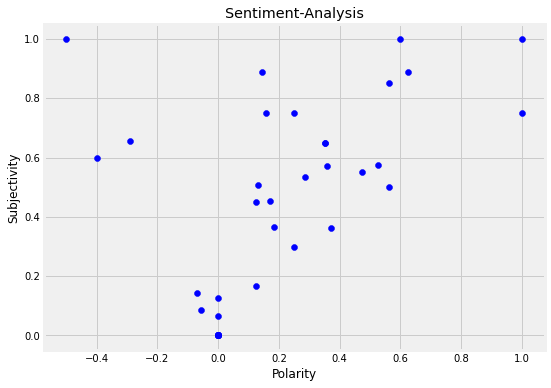

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
 
plt.title('Sentiment-Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Determinig the percentage of positive, negative and neutral tweets

In [ ]:
# get the percentage of positive tweets and negative tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
 
# get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
 
ptn = round((ptweets.shape[0] / df.shape[0])*100, 0)
ntn = round((ntweets.shape[0] / df.shape[0])*100, 0)
neu = round((100 - (ptn + ntn)), 0)
 
print("POSITIVE TWEETS:\t"+str(ptn)+"% [+]")
print("NEGATTIVE TWEETS:\t"+str(ntn)+"% [-]")
print("NEUTRAL TWEETS:\t\t"+str(neu)+"% [~]")

POSITIVE TWEETS:	55.0% [+]
NEGATTIVE TWEETS:	12.0% [-]
NEUTRAL TWEETS:		33.0% [~]


# Plotting the sentiments on a BAR GRAPH

<function matplotlib.pyplot.show>

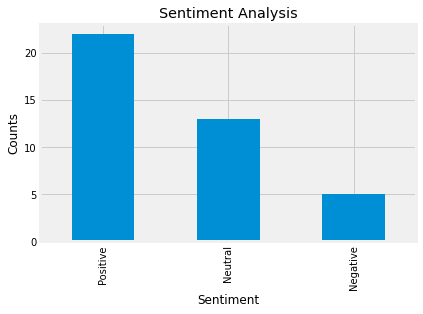

In [ ]:
# Show the value counts
df['Analysis'].value_counts()
 
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

# Plotting the sentiments on a PIE CHART

<function matplotlib.pyplot.show>

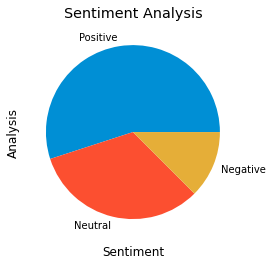

In [ ]:
# Show the value counts
df['Analysis'].value_counts()
 
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show

# Plotting the sentiments on a LINE GRAPH

<function matplotlib.pyplot.show>

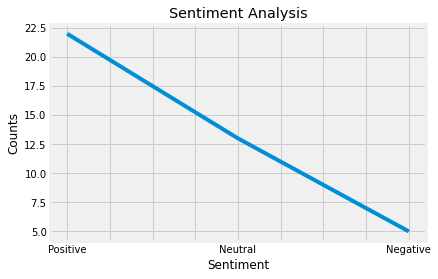

In [ ]:
# Show the value counts
df['Analysis'].value_counts()
 
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show